In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df_census = pd.read_csv("census_income.csv")
df_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Exploratory Data Analysis (EDA)**

In [38]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [39]:
df_census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [40]:
#missing values analysis
df_census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [41]:
#checking unique values
for i in df_census.columns:
  print(i,df_census[i].unique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt [ 77516  83311 215646 ...  34066  84661 257302]
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-

In [42]:
df_census.shape

(32561, 15)

In [43]:
#removing rows that contains '?'
rmve = []
for i in df_census.columns:
  for j in range(df_census.shape[0]):
    if df_census[i][j]=='?':
      rmve.append(j)
df_census.drop(index=rmve,inplace=True)

In [44]:
for i in df_census.columns:
  print(i,df_census[i].unique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
fnlwgt [ 77516  83311 215646 ...  84661 257302 201490]
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
education-num [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-

In [45]:
df_census.shape

(30162, 15)

In [54]:
df_census.drop(['relationship','capital-gain','capital-loss'],axis=1,inplace=True)
df_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


In [55]:
df_census.shape

(30162, 12)

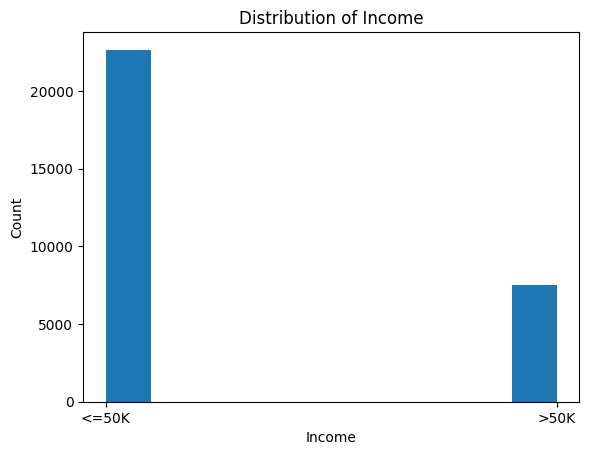

In [56]:
#Data Visualization
plt.hist(df_census['income'],bins=10)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.show()

<Axes: xlabel='occupation', ylabel='hours-per-week'>

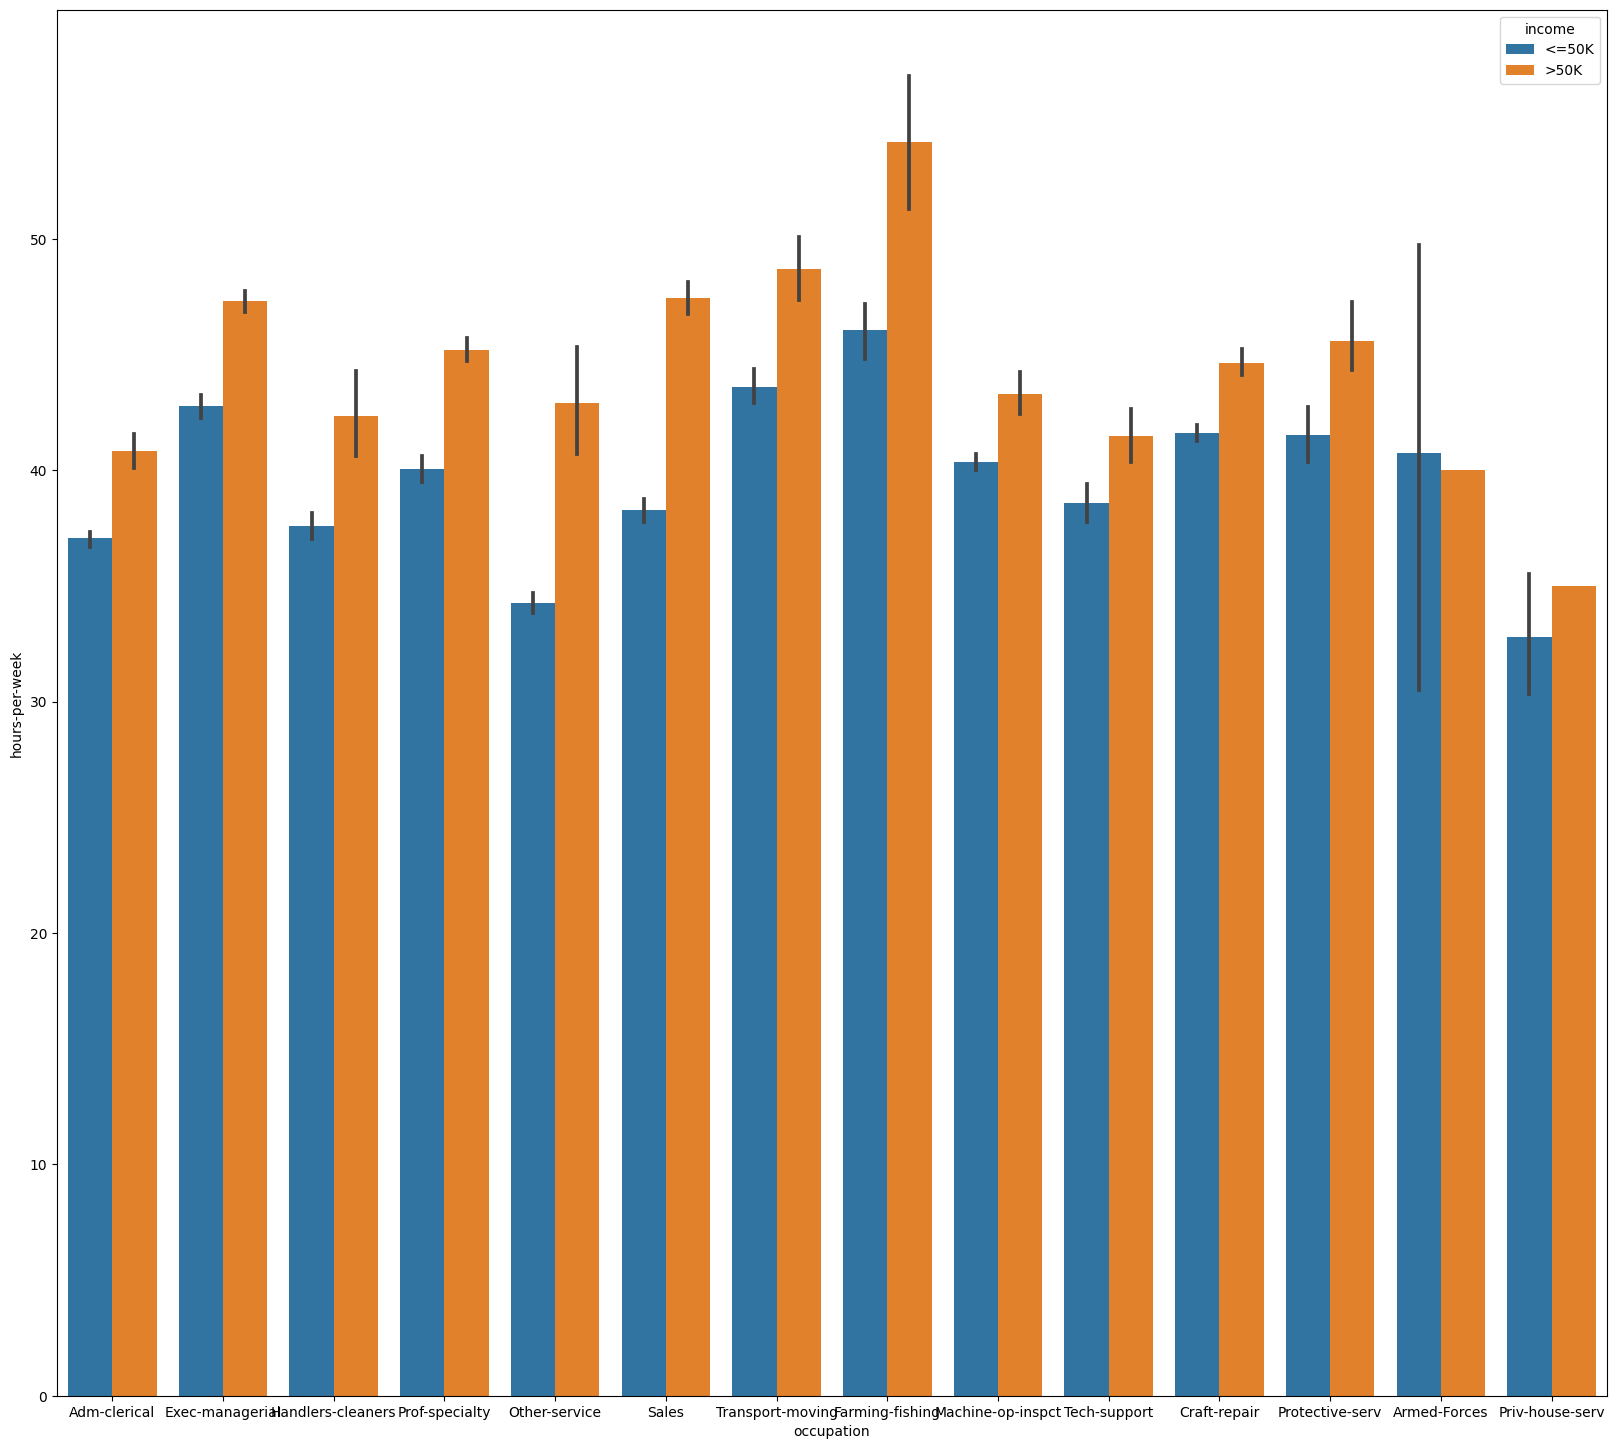

In [57]:
plt.figure(figsize=(20,18))
sns.barplot(x='occupation',y='hours-per-week',data=df_census,hue='income')

In [51]:
df_census.shape

(30162, 15)

<ipython-input-58-7158a26047c7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_census.corr(),annot=True)


<Axes: >

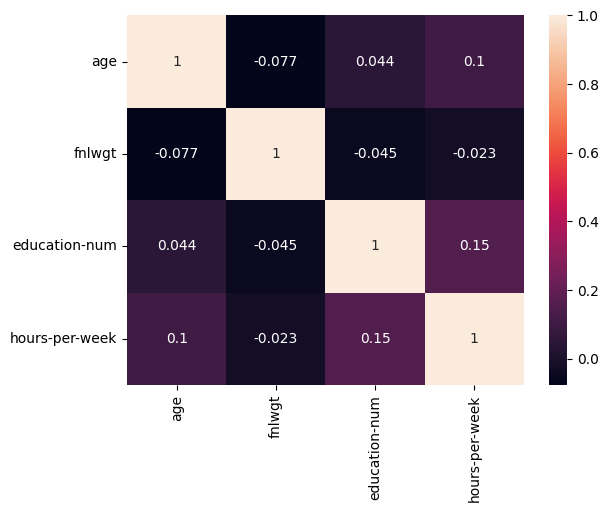

In [58]:
#heatmap
sns.heatmap(df_census.corr(),annot=True)

In [67]:
obj=[]
for i in df_census.columns:
    if df_census[i].dtype=='object':
        obj.append(i)
obj

['workclass',
 'education',
 'marital-status',
 'occupation',
 'race',
 'native-country']

In [70]:
y=df_census['income']
X=df_census.drop(['income'],axis=1)

In [71]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,1,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,1,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,1,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,1,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,1,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,1,20,United-States


In [72]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 30162, dtype: int64

In [74]:
#Data preprocessing
#Encoding categorical cariables

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
for i in obj:
  X[i] = encoder.fit_transform(np.array(X[i]).reshape(-1,1))

In [75]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country
0,39,5.0,77516,9.0,13,4.0,0.0,4.0,1,40,38.0
1,50,4.0,83311,9.0,13,2.0,3.0,4.0,1,13,38.0
2,38,2.0,215646,11.0,9,0.0,5.0,4.0,1,40,38.0
3,53,2.0,234721,1.0,7,2.0,5.0,2.0,1,40,38.0
4,28,2.0,338409,9.0,13,2.0,9.0,2.0,0,40,4.0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2.0,257302,7.0,12,2.0,12.0,4.0,0,38,38.0
32557,40,2.0,154374,11.0,9,2.0,6.0,4.0,1,40,38.0
32558,58,2.0,151910,11.0,9,6.0,0.0,4.0,0,40,38.0
32559,22,2.0,201490,11.0,9,4.0,0.0,4.0,1,20,38.0


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Machine Learning Techniques**

In [79]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [80]:
y_pred=dt.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3837  666]
 [ 674  856]]


0.7778882811205039

In [82]:
#Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [83]:
y_pred=rf.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4089  414]
 [ 646  884]]


0.8242996850654732